# Process Augment Augment Dummy Data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import alpha

## Import Data

In [41]:
data_path = 'data/indian_liver_patient.csv'

In [42]:
data = pd.read_csv(data_path)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Categorise Gender

In [44]:
data['Gender'] = (data['Gender']=='Male').astype(int)  # make gender an integer

## Generate dummy categorical variable

In [45]:
alpha_params = (1.5, -20, 100)
pdf = alpha.pdf(range(100), *alpha_params)

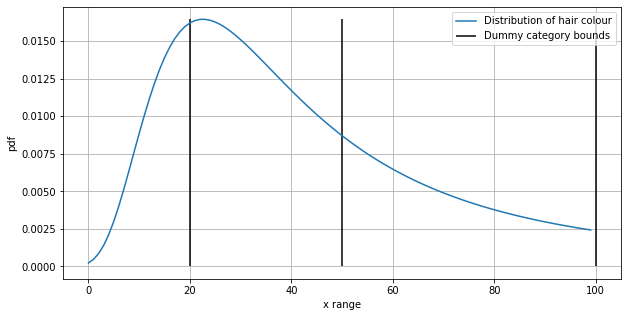

In [46]:
plt.rcParams['figure.figsize'] = 10, 5
plt.plot(pdf)
plt.vlines([20, 50, 100], ymin=0, ymax=pdf.max())
plt.legend(['Distribution of hair colour', 'Dummy category bounds'])
plt.grid()
plt.ylabel('pdf')
plt.xlabel('x range')
plt.show()

In [47]:
data['Dummy_Category'] = alpha.rvs(*alpha_params, size=data.shape[0]).clip(max=100, min=0)
data['Dummy_Category'] = pd.cut(data['Dummy_Category'], [0, 20, 50, 100], labels=['red', 'orange', 'yellow'])

## Dropna

In [48]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
Dummy_Category                0
dtype: int64

In [49]:
data.dropna(inplace=True)

## Clean Column Names

In [50]:
data.rename(columns={'Total_Protiens': 'Total_Proteins', 'Dataset': 'Liver_Patient'}, inplace=True)

In [51]:
data.columns = data.columns.str.lower()

In [52]:
data.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_proteins', 'albumin',
       'albumin_and_globulin_ratio', 'liver_patient', 'dummy_category'],
      dtype='object')

## Save Data

In [53]:
data.to_csv('data/dummy_data.csv')